In [1]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("01train.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [2]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [3]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized

data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()



手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3902,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3902,)
Shape Of The After Ouliers:  (3876,)
充電時間指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
手機電池電量
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
上網頻率指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
通話頻率指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
內容容量比率
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3874,)


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,38.933195,45.259631,51.762384,636.463190,0.226353,75.196094,3.315436,0.109646,0.015671,2523.744532,2178.910113,0.299432,0.859219,1.315436,0.429272
std,14.568923,15.585273,14.296186,650.101092,0.232406,13.992253,0.684855,0.091125,0.125291,1801.354384,1780.942241,0.574135,0.185151,0.684855,0.495036
min,7.902370,8.047619,2.562656,2.806544,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.547619,34.744048,43.495524,223.975000,0.029851,62.802128,3.000000,0.058465,-0.055764,932.325000,561.775000,0.000000,0.802700,1.000000,0.000000
50%,38.833333,46.952381,53.053333,408.900000,0.145455,76.668470,3.000000,0.085432,0.005888,2252.000000,1881.137906,0.000000,0.936326,1.000000,0.000000
75%,50.154762,57.446429,60.665000,820.243642,0.372403,86.727194,3.000000,0.144020,0.079059,3820.468151,3417.514397,1.000000,0.987093,1.000000,1.000000
max,75.619048,79.547619,118.066667,3839.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,1.000000,4.000000,1.000000


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEO

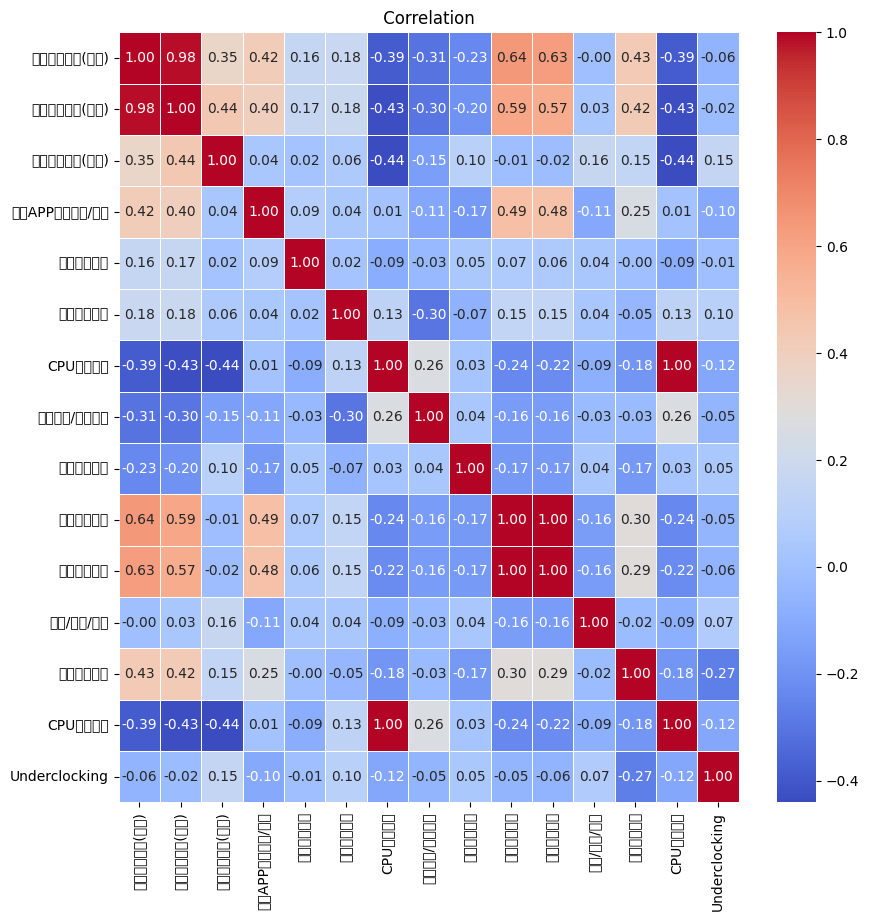

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [5]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
x_data = data_train[feature_ex].to_numpy()



def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

[[ 1.36283795 -0.59807235 -0.80420906 ...  2.06052434  2.16210656
   0.75637664]
 [ 0.92152866  0.44010071  2.17924874 ... -0.42959032 -0.42506029
   0.49196025]
 [-0.56691913 -1.05642201  0.01160813 ...  0.08646414  0.01230658
   0.76045912]
 ...
 [-1.36249209 -0.7086056   0.15838564 ... -1.34645221 -1.22361711
   0.16397248]
 [ 0.11082715  0.43263855  0.39141195 ...  0.59088476  0.60149517
  -0.70180382]
 [ 1.30890015  0.1695974  -0.8691186  ...  1.38594478  1.49102681
   0.32930451]]
[0 1 0 ... 0 0 0]


In [6]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [7]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.001,
                             max_depth=5,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7496962332928311
測試集:  0.7285223367697594


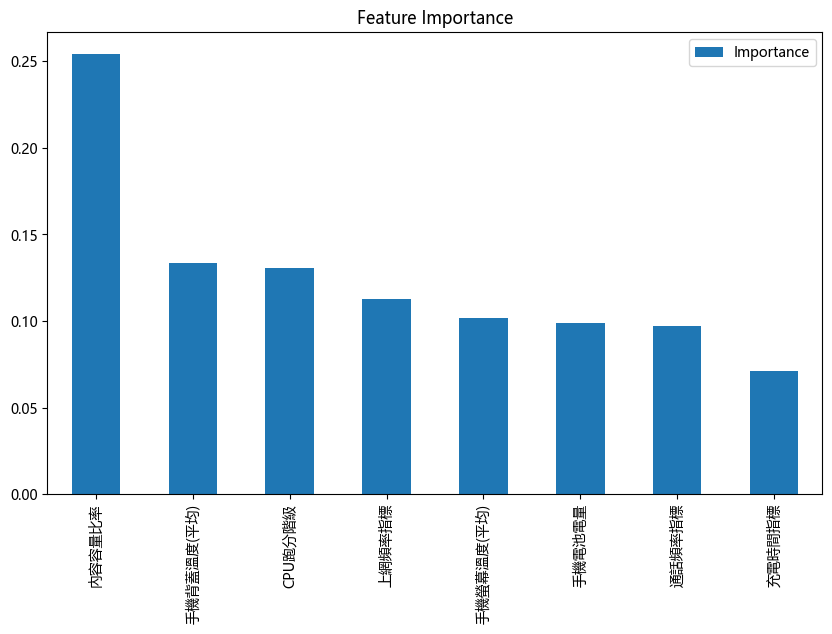

In [8]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [9]:


# 读取测试数据
data_test = pd.read_excel("01test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)

# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


In [10]:
data_test =pd.read_excel("01test.xlsx")
test_id=data_test.pop('id')

data_test=data_normalized(data_test)
data_test=data_standardized(data_test)

In [11]:
'''

def xgboostModel_fun(n=10000, lr=0.01, maxdepth=4, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 10
divisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(g=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()
'''

"\n\ndef xgboostModel_fun(n=10000, lr=0.01, maxdepth=4, g=10):\n    xgboostModel = XGBClassifier(n_estimators=n, \n                                 learning_rate=lr,\n                                 max_depth=maxdepth,\n                                 gamma=g)\n    return xgboostModel\n\notrn = []\notst = []\nchange = 10\ndivisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致\n\nfor g in divisors:\n    tree = xgboostModel_fun(g=g) \n    tree.fit(trainX, trainY) \n    otrn.append(1 - tree.score(trainX, trainY)) \n    otst.append(1 - tree.score(testX, testY))\n\nfig, ax = plt.subplots()\nfig.set_size_inches((10, 6))\n_=ax.plot(divisors, otrn, '--s', label='train', color='k')\n_=ax.plot(divisors, otst, '-o', label='test', color='gray')\n_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)\n_=ax.legend(loc=0)\n_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签\n_=ax.set_ylabel('Error', fontsize=14)\n_=ax.axis(xmin=0, xmax=change)  # xmax 为 change\nfig.tig

In [12]:
#Cross-validation
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

df =data_train
X = df[['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']].values
Y = df['Underclocking'].values

In [13]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.001
params['max_depth'] = 5
params['learning_rate'] = 0.001
params['gamma'] = 6

d_train = xgboost.DMatrix(trainX, label=trainY)
d_valid = xgboost.DMatrix(testX, label=testY)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgboost.train(params, d_train, 5000, watchlist, early_stopping_rounds=100, verbose_eval=10)
y_train = bst.predict(xgboost.DMatrix(trainX))
y_pred = bst.predict(xgboost.DMatrix(testX))
print("Accuracy(train): ", str(sum(trainY == (y_train > 0.5))/trainY.shape[0]))
print("Accuracy(test): ", str(sum(testY == (y_pred > 0.5))/testY.shape[0]))

[0]	train-logloss:0.68119	valid-logloss:0.69308
[10]	train-logloss:0.67928	valid-logloss:0.69138
[20]	train-logloss:0.67741	valid-logloss:0.68969
[30]	train-logloss:0.67558	valid-logloss:0.68804
[40]	train-logloss:0.67379	valid-logloss:0.68641
[50]	train-logloss:0.67204	valid-logloss:0.68478
[60]	train-logloss:0.67031	valid-logloss:0.68319
[70]	train-logloss:0.66861	valid-logloss:0.68162
[80]	train-logloss:0.66694	valid-logloss:0.68008
[90]	train-logloss:0.66529	valid-logloss:0.67856
[100]	train-logloss:0.66368	valid-logloss:0.67708
[110]	train-logloss:0.66208	valid-logloss:0.67559
[120]	train-logloss:0.66050	valid-logloss:0.67412
[130]	train-logloss:0.65895	valid-logloss:0.67267
[140]	train-logloss:0.65744	valid-logloss:0.67123
[150]	train-logloss:0.65595	valid-logloss:0.66981


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[160]	train-logloss:0.65448	valid-logloss:0.66841
[170]	train-logloss:0.65304	valid-logloss:0.66702
[180]	train-logloss:0.65161	valid-logloss:0.66566
[190]	train-logloss:0.65022	valid-logloss:0.66433
[200]	train-logloss:0.64885	valid-logloss:0.66303
[210]	train-logloss:0.64750	valid-logloss:0.66174
[220]	train-logloss:0.64617	valid-logloss:0.66048
[230]	train-logloss:0.64486	valid-logloss:0.65922
[240]	train-logloss:0.64356	valid-logloss:0.65798
[250]	train-logloss:0.64229	valid-logloss:0.65674
[260]	train-logloss:0.64103	valid-logloss:0.65553
[270]	train-logloss:0.63979	valid-logloss:0.65435
[280]	train-logloss:0.63857	valid-logloss:0.65319
[290]	train-logloss:0.63731	valid-logloss:0.65204
[300]	train-logloss:0.63607	valid-logloss:0.65091
[310]	train-logloss:0.63485	valid-logloss:0.64979
[320]	train-logloss:0.63363	valid-logloss:0.64869
[330]	train-logloss:0.63242	valid-logloss:0.64761
[340]	train-logloss:0.63124	valid-logloss:0.64653
[350]	train-logloss:0.63008	valid-logloss:0.64549


In [14]:

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_test = pd.read_excel("01test.xlsx")
data_test.head() # Show data (看看是否讀取成功)
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
x_test = data_test[feature_ex].to_numpy()
data_test=data_normalized(x_test)
data_test=data_standardized(x_test)

In [15]:
predicted_ans=xgboostModel.predict(x_test)
my_submission=pd.DataFrame({'id':test_id,'Underclocking':predicted_ans})
my_submission.to_csv('submission_01.csv',index=False)